#Importing Libraries


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



# Data Collection and processing

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 17.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1


In [7]:
# loadng a csv data to pandas dataframe
gold_data = pd.read_csv("/root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1/gld_price_data.csv")

In [21]:
# print first 5 rows of the data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_data.size


13740

In [14]:
#number of rows and cols
gold_data.shape

(2290, 6)

In [15]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
#checking the no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [18]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

1. Positive Correlation
2. Negative Correlation

In [25]:

correlation = gold_data.select_dtypes(include=['number']).corr()
print(correlation)



              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

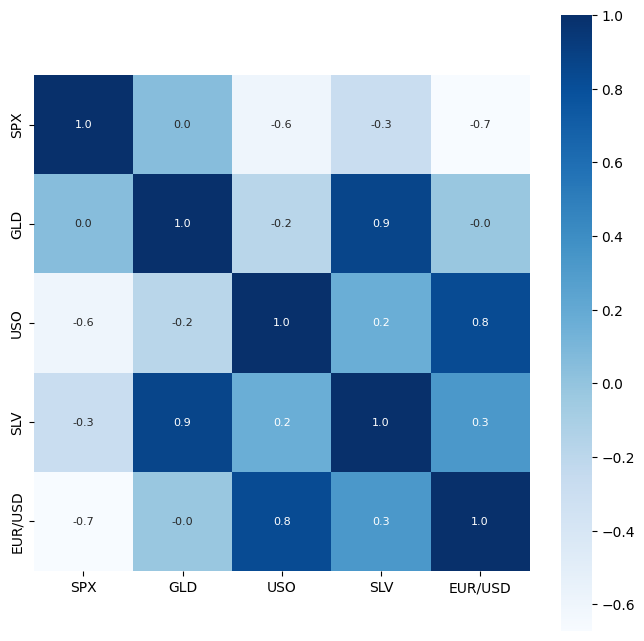

In [27]:
# constructing A heat map to understand a correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [28]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-29-fcbd5ed2c09e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

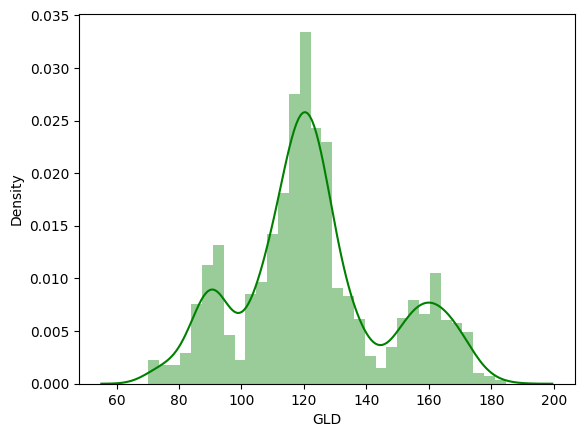

In [29]:
# checking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

# Splitting the features and target

In [33]:
X = gold_data.drop(['GLD','Date'],axis=1)
Y = gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


# Splitting into training data and Test data

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Model training : Radnom Forest Regressor

In [39]:
regressor = RandomForestRegressor(n_estimators=100)

In [41]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#Model Evaluation

In [42]:
#prediction on test Data
test_data_prediction = regressor.predict(X_test)

In [43]:
print(test_data_prediction)

[168.40959947  81.96659973 116.19570018 127.66970095 120.87610099
 154.67829708 150.39899898 126.10840025 117.54149883 126.06550052
 116.72520151 172.77220119 141.39079855 167.61009824 115.24180016
 117.65080057 138.77150345 170.0356014  159.25750252 162.58529901
 155.06449988 125.60170033 176.51289894 157.17670384 125.19440057
  93.7011993   77.68549969 120.57240013 119.12519946 167.4250992
  87.99490066 125.21690002  90.94720083 117.6662003  121.02349951
 136.67390033 115.49330084 115.28380087 149.15160021 107.12020072
 104.63320256  87.29179804 126.31880061 117.77870067 152.96249944
 119.65730028 108.35410023 108.12689824  93.34500076 127.06079824
  75.14240039 113.7585989  121.55469999 111.15199881 118.88389894
 121.02079934 159.46130045 167.60460128 147.08659634  85.86639852
  94.41160027  86.6585993   90.48030041 119.05280089 126.45100066
 127.73610015 169.34189951 122.20229932 117.22139898  98.58640033
 168.10490071 142.6028982  132.2566028  121.26190246 120.96279961
 119.819900

In [44]:
# R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.9893927251918962


# Compare the actual values and predicted values in a Plot

In [45]:
Y_test = list(Y_test)

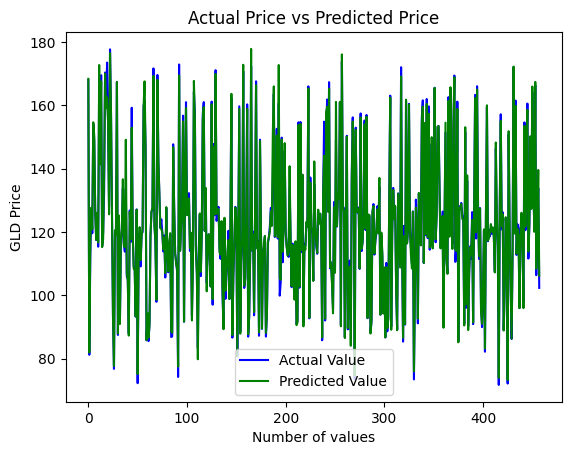

In [49]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()